In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score,mean_squared_error,mean_absolute_error

In [2]:
df=pd.read_csv("/content/TrafficTwoMonth.csv")

Data preprocessing

In [3]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [4]:
df.tail()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
5947,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
5948,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
5949,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
5950,11:30:00 PM,9,Thursday,16,5,0,27,48,normal
5951,11:45:00 PM,9,Thursday,14,3,1,15,33,low


In [5]:
df.shape

(5952, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


In [7]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,16.000000,65.440692,12.161458,12.912970,18.646337,109.161458
std,8.945023,44.749335,11.537944,12.497736,10.973139,55.996312
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.750000,3.000000,2.000000,10.000000,54.000000
50%,16.000000,62.000000,9.000000,10.000000,18.000000,104.000000
75%,24.000000,103.000000,19.000000,20.000000,27.000000,153.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [8]:
df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [9]:
df.drop(['Date'],axis=1,inplace=True)

In [10]:
df.value_counts()

Time         Day of the week  CarCount  BikeCount  BusCount  TruckCount  Total  Traffic Situation
10:00:00 AM  Friday           100       26         14        6           146    normal               1
5:45:00 PM   Wednesday        137       40         28        9           214    heavy                1
6:00:00 AM   Friday           75        6          7         13          101    low                  1
                              73        6          3         43          125    high                 1
                                        4          0         39          116    high                 1
                                                                                                    ..
1:45:00 PM   Wednesday        100       27         23        16          166    normal               1
                                        7          11        22          140    normal               1
                              96        1          5         25          127  

In [11]:
df['Time'].value_counts()

12:00:00 AM    62
12:15:00 AM    62
5:30:00 PM     62
5:15:00 PM     62
5:00:00 PM     62
               ..
7:15:00 AM     62
7:00:00 AM     62
6:45:00 AM     62
6:30:00 AM     62
11:45:00 PM    62
Name: Time, Length: 96, dtype: int64

In [12]:
df['Day of the week'].value_counts()

Tuesday      960
Wednesday    960
Thursday     960
Friday       768
Saturday     768
Sunday       768
Monday       768
Name: Day of the week, dtype: int64

In [13]:
df['Traffic Situation'].value_counts()

normal    3610
heavy     1137
low        834
high       371
Name: Traffic Situation, dtype: int64

In [14]:
df.head()

,Time,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,Tuesday,11,2,1,34,48,normal


In [15]:
ts=en.fit_transform(df['Traffic Situation'])

DATA VISUALIZATION

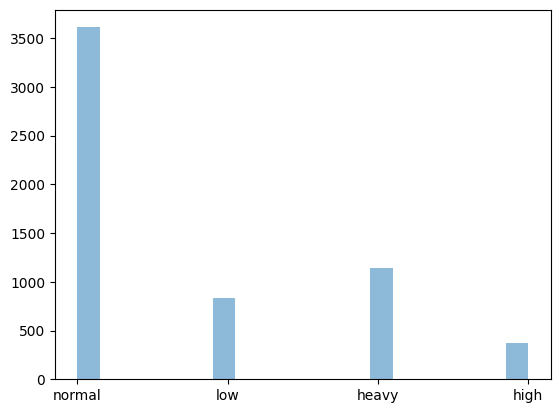

In [16]:
plt.hist(df['Traffic Situation'],bins=20,alpha=0.5)
plt.show()

<Axes: ylabel='Density'>

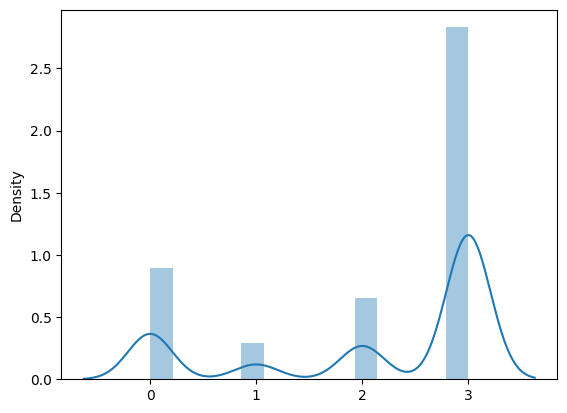

In [17]:
sns.distplot(ts,label='Traffic Situation')

<Axes: ylabel='Density'>

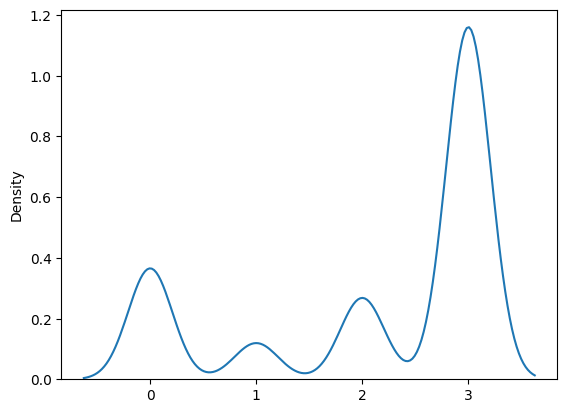

In [18]:
sns.kdeplot(ts,label='Traffic Situation')

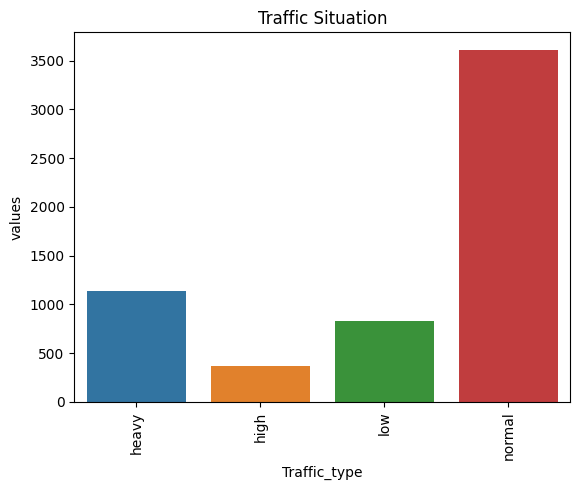

In [19]:
c=df.groupby('Traffic Situation')['Traffic Situation'].count()
sns.barplot(x=c.index,y=c.values)
plt.xticks(rotation=90)
plt.title('Traffic Situation')
plt.xlabel('Traffic_type')
plt.ylabel('values')
plt.show()

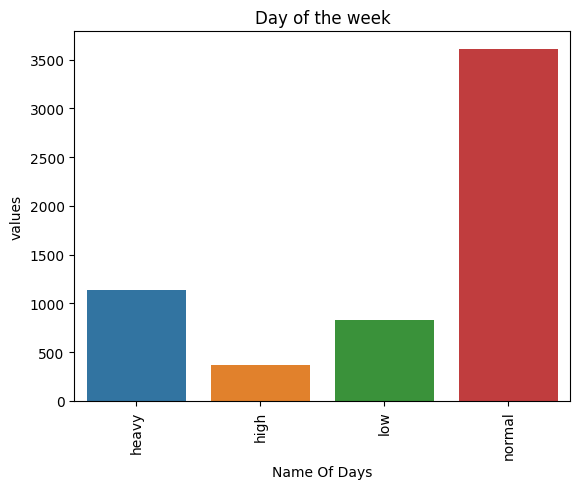

In [20]:
d=df.groupby('Day of the week')['Day of the week'].count()
sns.barplot(x=c.index,y=c.values)
plt.xticks(rotation=90)
plt.title('Day of the week')
plt.xlabel('Name Of Days')
plt.ylabel('values')
plt.show()

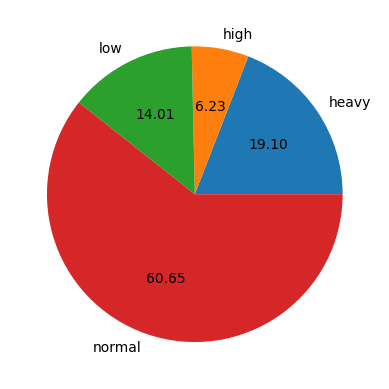

In [21]:
plt.pie(c,labels=c.index,autopct="%.2f")
plt.show()

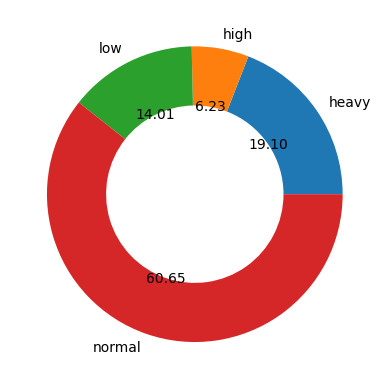

In [22]:
plt.pie(c,labels=c.index,autopct="%.2f",wedgeprops=dict(width=0.4))
plt.show()

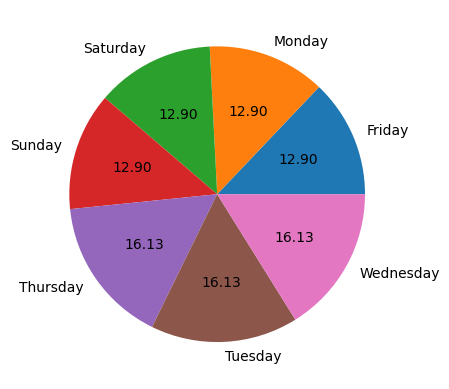

In [23]:
plt.pie(d,labels=d.index,autopct="%.2f")
plt.show()

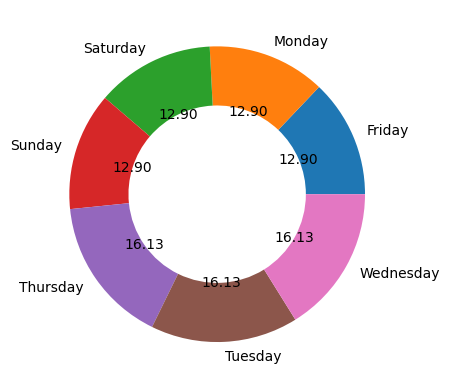

In [24]:
plt.pie(d,labels=d.index,autopct="%.2f",wedgeprops=dict(width=0.4))
plt.show()

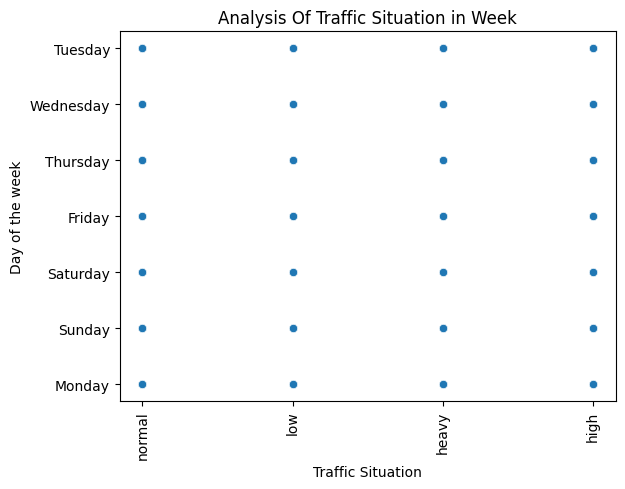

In [25]:
sns.scatterplot(x="Traffic Situation",y='Day of the week',data=df)
plt.xticks(rotation=90)
plt.title('Analysis Of Traffic Situation in Week')
plt.ylabel('Day of the week')
plt.xlabel('Traffic Situation')
plt.show()

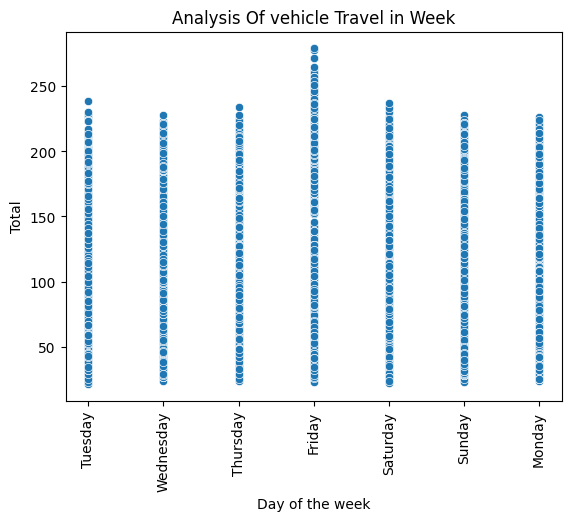

In [26]:
sns.scatterplot(x='Day of the week',y='Total',data=df)
plt.xticks(rotation=90)
plt.title('Analysis Of vehicle Travel in Week')
plt.xlabel('Day of the week')
plt.ylabel('Total')
plt.show()

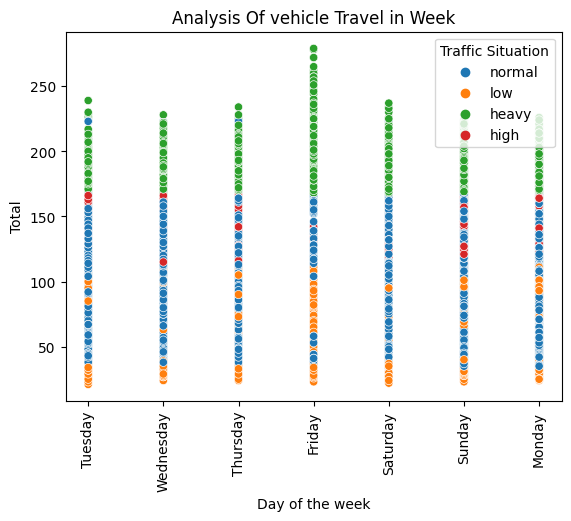

In [27]:
sns.scatterplot(x='Day of the week',y='Total',data=df,hue='Traffic Situation')
plt.xticks(rotation=90)
plt.title('Analysis Of vehicle Travel in Week')
plt.xlabel('Day of the week')
plt.ylabel('Total')
plt.show()

In [28]:
df['Day of the week']=en.fit_transform(df['Day of the week'])
df['Time']=en.fit_transform(df['Time'])
df['Traffic Situation']=en.fit_transform(df['Traffic Situation'])

In [29]:
df.head(10)

,Time,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,16,5,13,2,2,24,41,3
1,18,5,14,1,1,36,52,3
2,20,5,10,2,2,32,46,3
3,22,5,10,2,2,36,50,3
4,24,5,11,2,1,34,48,3
5,26,5,15,1,1,39,56,3
6,28,5,14,2,2,27,45,3
7,30,5,13,2,1,20,36,3
8,32,5,7,0,0,26,33,3
9,34,5,13,0,0,34,47,3


In [30]:
model=RandomForestClassifier(n_estimators=15)

In [31]:
feature=df.drop(['Traffic Situation'],axis=1)

In [32]:
target=df['Traffic Situation']

In [33]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=0)

In [34]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=15)

In [35]:
train_score=model.score(x_train,y_train)
print("Training Score:",train_score)

Training Score: 1.0


In [36]:
test_score=model.score(x_test,y_test)
print("Testing Score:",test_score)

Testing Score: 0.9941225860621327


In [37]:
y_pred=model.predict(x_test)
print("Predicted Value:",y_pred)

Predicted Value: [3 2 3 ... 2 3 0]


In [38]:
acc=accuracy_score(y_test,y_pred)
print("Accuracy Score:",acc)

Accuracy Score: 0.9941225860621327


In [39]:
r2_score=r2_score(y_test,y_pred)
print("R2 Score:",r2_score)

R2 Score: 0.9884203373039225


In [40]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [41]:
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)

Mean Absolute Error: 0.009235936188077247
Mean Squared Error: 0.01595298068849706
Root Mean Squared Error: 0.1263051095106491


In [42]:
report=classification_report(y_test,y_pred)
print("Classification Report:",report)

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       0.97      0.97      0.97        70
           2       0.99      0.99      0.99       162
           3       0.99      1.00      1.00       740

    accuracy                           0.99      1191
   macro avg       0.99      0.99      0.99      1191
weighted avg       0.99      0.99      0.99      1191



In [43]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:",cm)

Confusion Matrix: [[219   0   0   0]
 [  0  68   0   2]
 [  0   0 160   2]
 [  0   2   1 737]]


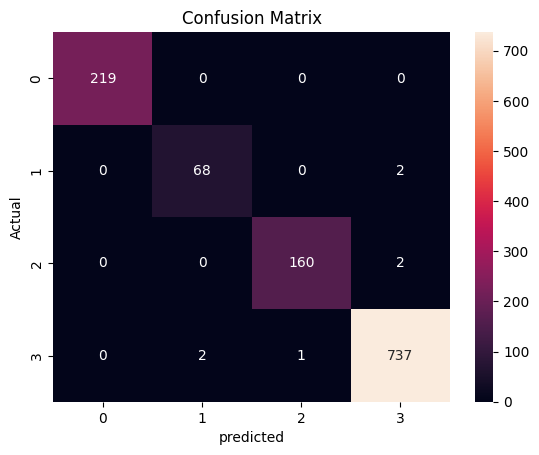

In [45]:
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()